In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from matplotlib import cm
import seaborn as sns


In [21]:
a="C:\\Users\\om sai\\Downloads\\students_awards.csv"

In [22]:
input_df= pd.read_csv(a)

In [23]:
input_df.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


In [24]:
df= pd.get_dummies(input_df,columns=['prog'],drop_first=True)

In [25]:
df.head()

,id,num_awards,math,prog_2,prog_3
0,45,0,41,0,1
1,108,0,41,0,0
2,15,0,44,0,1
3,67,0,42,0,1
4,153,0,40,0,1


In [26]:
list(df.columns)

['id', 'num_awards', 'math', 'prog_2', 'prog_3']

In [27]:
df.columns=['id','num_awards','math','general','academic']

In [28]:
df.drop('id',axis=1,inplace=True)

In [29]:
df.head()

,num_awards,math,general,academic
0,0,41,0,1
1,0,41,0,0
2,0,44,0,1
3,0,42,0,1
4,0,40,0,1


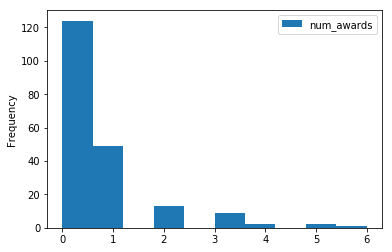

In [30]:
input_df.plot(y='num_awards',x='math',kind='hist')

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
formula ='num_awards~math+general+academic'
poisson_results = smf.glm(formula,data=df,
                          family=sm.families.Poisson()).fit()


In [35]:
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Sat, 22 Feb 2020   Deviance:                       189.45
Time:                        12:40:54   Pearson chi2:                     212.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2471      0.658     -7.969      0.000      -6.538      -3.957
math           0.0702      0.011      6.619      0.0